## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings('ignore')

### Loading Dataset

In [3]:
df=pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
df.shape

(2200, 8)

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [17]:
df.duplicated().sum()

0

In [19]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [21]:
df.N.value_counts().reset_index()

,N,count
0,22,44
1,40,44
2,27,42
3,39,41
4,31,41
...,...,...
132,136,2
133,139,1
134,135,1
135,130,1


<function matplotlib.pyplot.show(close=None, block=None)>

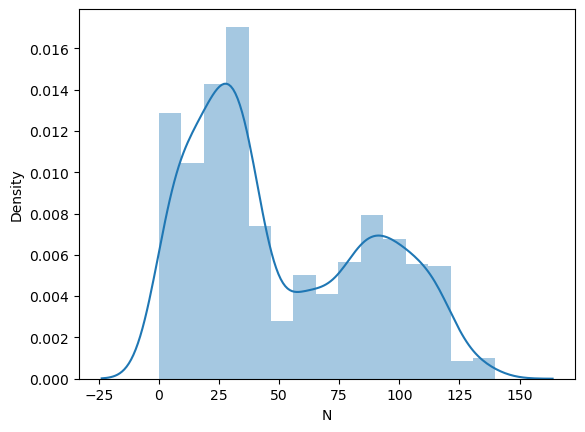

In [23]:
sns.distplot(df['N'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

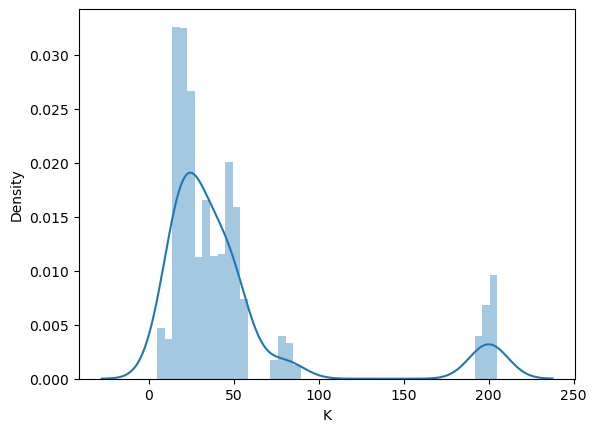

In [25]:
sns.distplot(df['K'])
plt.show

In [27]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [29]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [31]:
df['label'].unique().size

22

Text(0.5, 1.0, 'Rainfall')

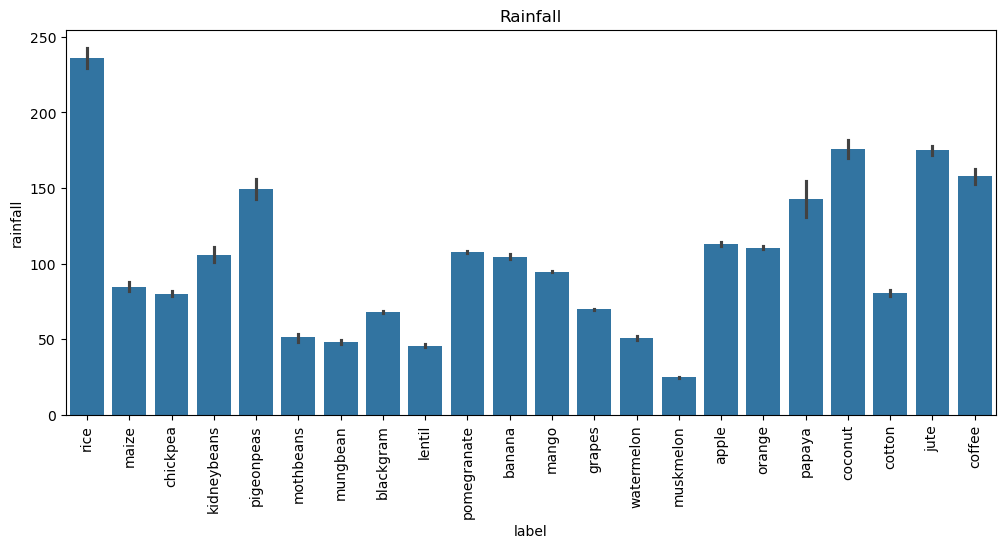

In [33]:
plt.figure(figsize=(12, 5)) 
sns.barplot(df,x='label',y='rainfall')
plt.xlabel('label')
plt.ylabel('rainfall')
plt.xticks(rotation = 90)
plt.title('Rainfall')

Text(0.5, 1.0, 'Temperature')

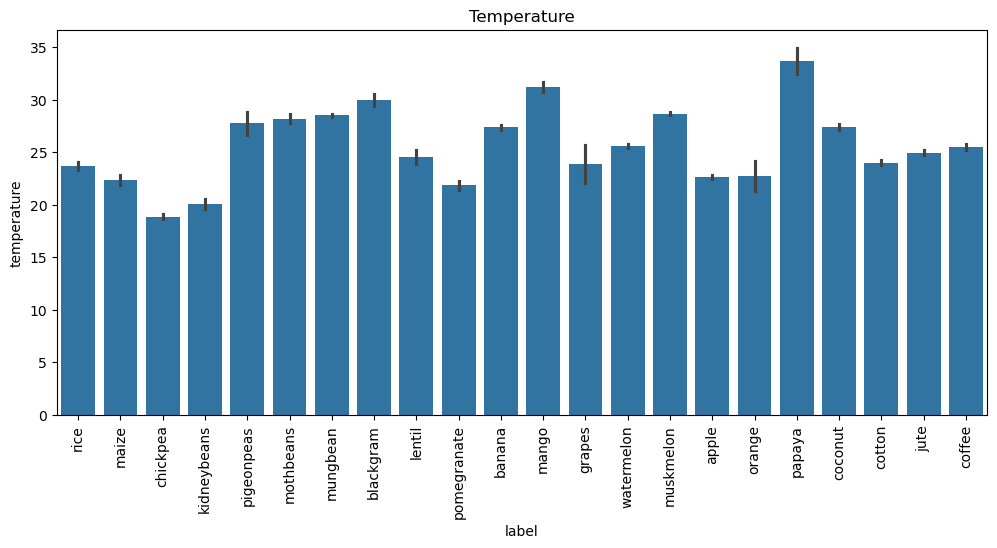

In [35]:
plt.figure(figsize=(12, 5)) 
sns.barplot(df,x='label',y='temperature')
plt.xlabel('label')
plt.ylabel('temperature')
plt.xticks(rotation = 90)
plt.title('Temperature')

Text(0.5, 1.0, 'ph')

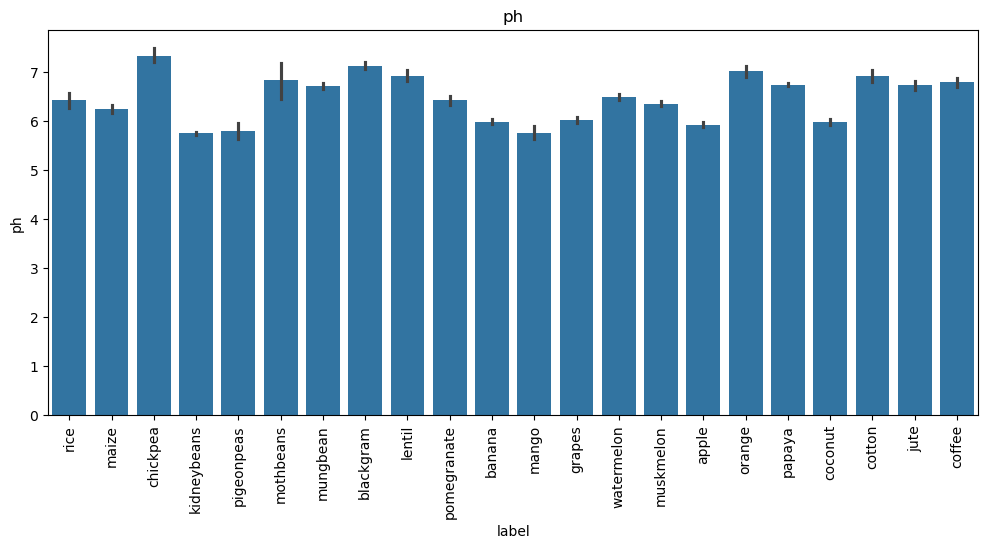

In [37]:
plt.figure(figsize=(12, 5)) 
sns.barplot(df,x='label',y='ph')
plt.xlabel('label')
plt.ylabel('ph')
plt.xticks(rotation = 90)
plt.title('ph')

In [39]:
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()

In [41]:
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

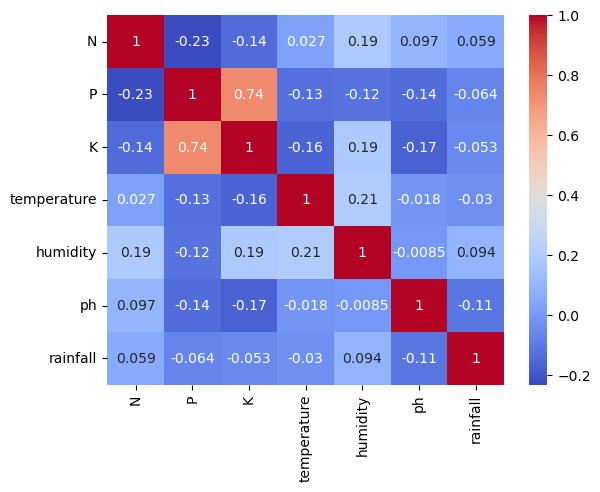

In [43]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

### Train Test split

In [46]:
X= df.drop('label', axis = 1)
y= df['label']

In [48]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [50]:
X.shape

(2200, 7)

In [52]:
y.shape

(2200,)

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
X_train.shape

(1760, 7)

In [60]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [64]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred= lr.predict(X_test)
score= accuracy_score(y_test, y_pred)
print(f"LogisticRegression model accuracy:{score}")

LogisticRegression model accuracy:0.9181818181818182


In [68]:
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_pred= Rf.predict(X_test)
score= accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier model accuracy:{score}")

RandomForestClassifier model accuracy:0.9931818181818182


In [72]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred= Dt.predict(X_test)
score= accuracy_score(y_test, y_pred)
print(f"DecisionTreeClassifier model accuracy:{score}")

DecisionTreeClassifier model accuracy:0.9818181818181818


In [76]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9181818181818182
Decision Tree  with accuracy : 0.9886363636363636
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.990909090909091
AdaBoost  with accuracy : 0.09545454545454546
Gradient Boosting  with accuracy : 0.9818181818181818


In [78]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Predicting

In [85]:
from sklearn.metrics import classification_report
import joblib

# Define features and target variable
features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
target = "label"

# Splitting data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Save the trained model
joblib.dump(model, "crop_recommendation_model.pkl")

print("Model saved successfully as 'crop_recommendation_model.pkl'")

Model saved successfully as 'crop_recommendation_model.pkl'


In [88]:
import json
from flask import Flask, request, jsonify

In [ ]:
# Load the trained model
model = joblib.load("crop_recommendation_model.pkl")
# Define the feature names
features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
# Initialize Flask app
app = Flask(__name__)

@app.route("/")
def home():
    return "Crop Recommendation Chatbot API is running!"

    
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get input data from the request
        data = request.get_json()
        
         # Extract feature values
        input_data = [data[feature] for feature in features]
        
        # Predict the recommended crop
        prediction = model.predict([input_data])[0]

        # Return prediction as JSON response
        return jsonify({"recommended_crop": prediction})

    except Exception as e:
        return jsonify({"error": str(e)})

# Run the Flask app
if __name__ == "__main__":
    app.run(port=5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
127.0.0.1 - - [01/Feb/2025 12:50:17] "POST /predict HTTP/1.1" 200 -


In [ ]:
curl -X POST http://127.0.0.1:5002/predict -H "Content-Type: application/json" -d "{\"N\": 35, \"P\": 52, \"K\": 28, \"temperature\": 32, \"humidity\": 75, \"ph\": 5, \"rainfall\": 100}"
